**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['ID', 'Entity', 'Sentiment', 'Comment']
df = pd.read_csv('/content/twitter_training.csv', header=0, names=column_names)

In [3]:
df.head()

,ID,Entity,Sentiment,Comment
0,7470,LeagueOfLegends,Neutral,I haven’t posted anything so I do want to let ...
1,7470,LeagueOfLegends,Neutral,I haven ’ t posted today so I just want to com...
2,7470,LeagueOfLegends,Neutral,probably haven’t posted shit so I just forgot ...
3,7471,LeagueOfLegends,Neutral,League of Legends (Feeling a little depressed ...
4,7471,LeagueOfLegends,Neutral,"League of Legends (I feel a bit depressed, so ..."


**Exploratory Data Analysis**

In [4]:
df.shape

(42813, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42813 entries, 0 to 42812
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         42813 non-null  int64 
 1   Entity     42813 non-null  object
 2   Sentiment  42813 non-null  object
 3   Comment    42400 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
# Count of unique entities
entity_count = df['Entity'].value_counts()
print(entity_count)

Entity
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
CallOfDuty                           2394
Verizon                              2382
Facebook                             2370
Battlefield                          2346
TomClancysGhostRecon                 2346
FIFA                                 2340
johnson&johnson                      2328
HomeDepot                            2310
GrandTheftAuto(GTA)                  2304
Cyberpunk2077                        2304
Hearthstone                          2298
Nvidia                               2298
Fortnite                             2274
PlayerUnknownsBattlegrounds(PUBG)    2274
RedDeadRedemption(RDR)               2262
LeagueOfLegends                       783
Name: count, dtype: int64


In [7]:
duplicates = df.duplicated()
duplicated_rows = df[duplicates]
duplicated_rows.count()

ID           1468
Entity       1468
Sentiment    1468
Comment      1242
dtype: int64

In [8]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Comment      187
dtype: int64

In [10]:
# Dropping missing value [ Using Dropna]
df = df.dropna()

In [11]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Comment      0
dtype: int64

In [12]:
# Number of Unique Values
df.nunique()

ID            7136
Entity          19
Sentiment        4
Comment      40032
dtype: int64

In [13]:
for i in range(5):
    print(f"{i+1}: {df['Comment'][i]}   ->   {df['Sentiment'][i]}")

1: I haven’t posted anything so I do want to let you all know I’ve been working all day earning cash money and now I’m relaxing getting my rest done before streaming all week   ->   Neutral
2: I haven ’ t posted today so I just want to come let to you you all know because I ’ ve been working all day makin cash money already and now I ’ just m relaxing and getting my hair done right before streaming all week   ->   Neutral
3: probably haven’t posted shit so I just forgot to let you all know I’ve been working all day makin cash today and now I’m relaxing and my hair done before streaming all night   ->   Neutral
4: League of Legends (Feeling a little depressed atm, so no cam) twitch.tv/gamezor   ->   Neutral
5: League of Legends (I feel a bit depressed, so no cam) twitch.tv / gamezor   ->   Neutral


**Sentiment Analysis**

In [14]:
df['Sentiment'].value_counts()

Sentiment
Negative      14053
Positive      10212
Neutral        9624
Irrelevant     7269
Name: count, dtype: int64

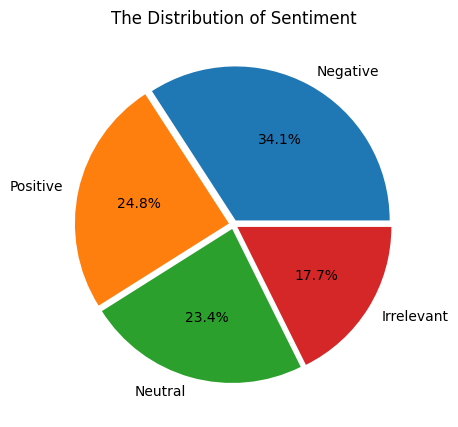

In [17]:
plt.figure(figsize=(10,5))
plt.pie(x=df['Sentiment'].value_counts().values,
        labels=df['Sentiment'].value_counts().index,
        autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()

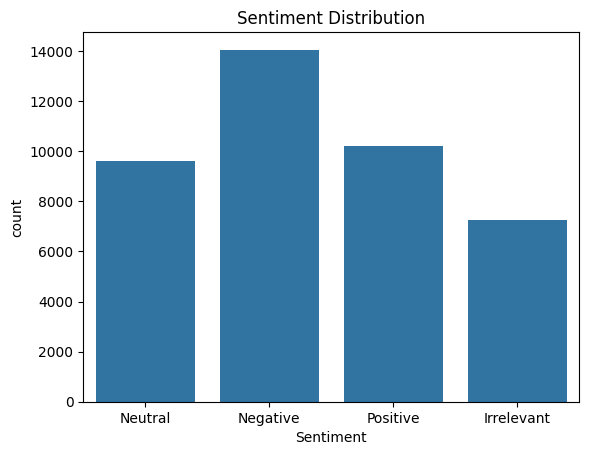

In [19]:
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

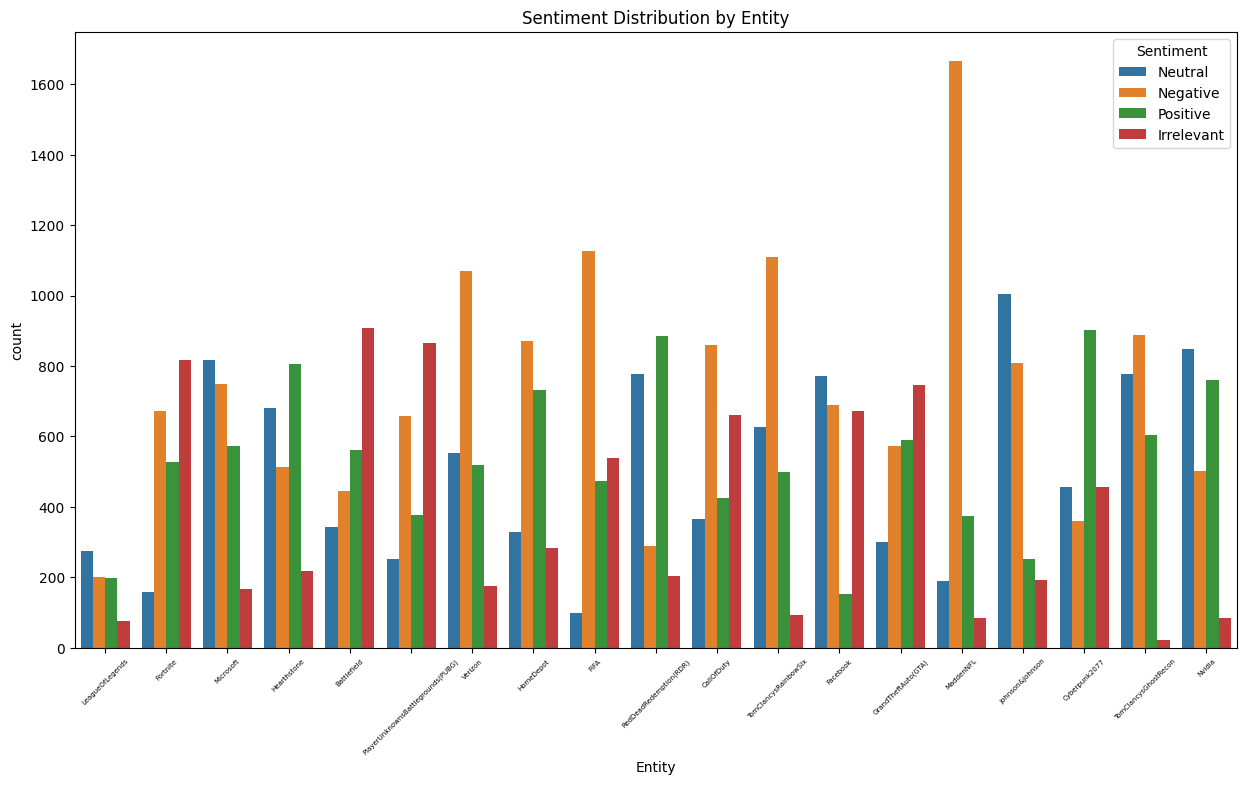

In [21]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Entity', hue='Sentiment', data=df)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()